In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv(r"D:\fake news detection\News.csv")
data

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...,...
44914,21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44915,21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44916,21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44917,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [4]:
data.shape

(44919, 6)

In [5]:
print(data.columns)


Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'class'], dtype='object')


In [6]:
data = data.drop(["title", "subject", "date"], axis=1, errors='ignore')


In [7]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)


In [8]:
data = data.sample(frac=1)
data

,Unnamed: 0,text,class
2071,2648,"ASPEN, Colorado (Reuters) - The Trump administ...",1
9942,6698,Glenn Beck has shared his opinion on the bigot...,0
23902,12089,,0
16145,18492,LONDON (Reuters) - London s East Croydon stati...,1
11197,6576,A teenage girl in Oklahoma is being charged as...,0
...,...,...,...
17656,10855,WASHINGTON (Reuters) - A Republican-controlled...,1
14372,20277,Except when someone tries to rob them or break...,0
38813,19757,"SITTWE, Myanmar (Reuters) - Thousands of Rohi...",1
30688,17262,"Of course, the government will have to address...",0


In [9]:
data.reset_index(inplace=True)

In [10]:
data

,index,Unnamed: 0,text,class
0,2071,2648,"ASPEN, Colorado (Reuters) - The Trump administ...",1
1,9942,6698,Glenn Beck has shared his opinion on the bigot...,0
2,23902,12089,,0
3,16145,18492,LONDON (Reuters) - London s East Croydon stati...,1
4,11197,6576,A teenage girl in Oklahoma is being charged as...,0
...,...,...,...,...
44914,17656,10855,WASHINGTON (Reuters) - A Republican-controlled...,1
44915,14372,20277,Except when someone tries to rob them or break...,0
44916,38813,19757,"SITTWE, Myanmar (Reuters) - Thousands of Rohi...",1
44917,30688,17262,"Of course, the government will have to address...",0


In [11]:
print(data.columns)


Index(['index', 'Unnamed: 0', 'text', 'class'], dtype='object')


In [12]:
data.drop(["index"], axis=1, inplace=True, errors='ignore')
data

,Unnamed: 0,text,class
0,2648,"ASPEN, Colorado (Reuters) - The Trump administ...",1
1,6698,Glenn Beck has shared his opinion on the bigot...,0
2,12089,,0
3,18492,LONDON (Reuters) - London s East Croydon stati...,1
4,6576,A teenage girl in Oklahoma is being charged as...,0
...,...,...,...
44914,10855,WASHINGTON (Reuters) - A Republican-controlled...,1
44915,20277,Except when someone tries to rob them or break...,0
44916,19757,"SITTWE, Myanmar (Reuters) - Thousands of Rohi...",1
44917,17262,"Of course, the government will have to address...",0


<Axes: xlabel='class', ylabel='count'>

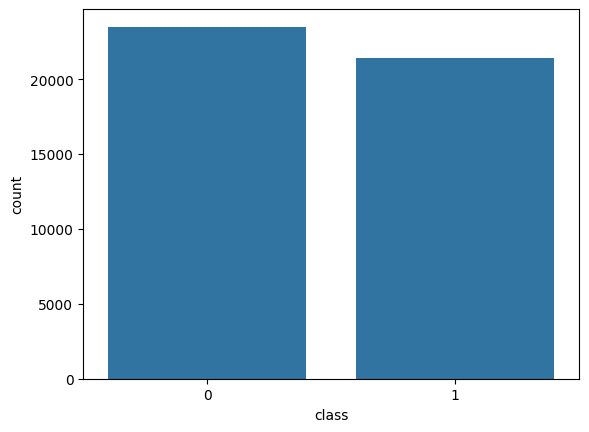

In [13]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [14]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\M THIRUPATHI
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\M THIRUPATHI
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Preprocessing function
def preprocess_text(text_data):
    stop_words = set(stopwords.words('english'))  # Store stopwords in a set for faster lookup
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        # Remove punctuation and tokenize
        sentence = re.sub(r'[^\w\s]', '', sentence)
        # Lowercase and filter out stopwords using list comprehension
        filtered_sentence = ' '.join(token.lower() for token in sentence.split() if token.lower() not in stop_words)
        preprocessed_text.append(filtered_sentence)

    return preprocessed_text

In [16]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████| 44919/44919 [00:20<00:00, 2195.29it/s]


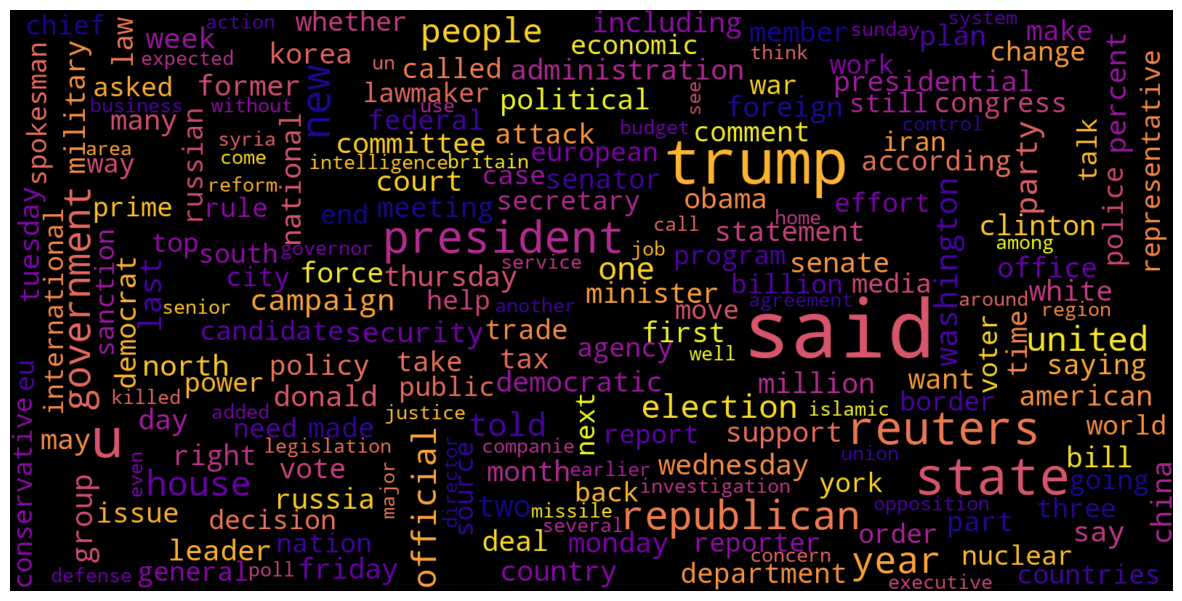

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Real
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=51,
                      max_font_size=110,
                      collocations=False,
                     background_color='black',  # Change background color
                    colormap='plasma'
                     )
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


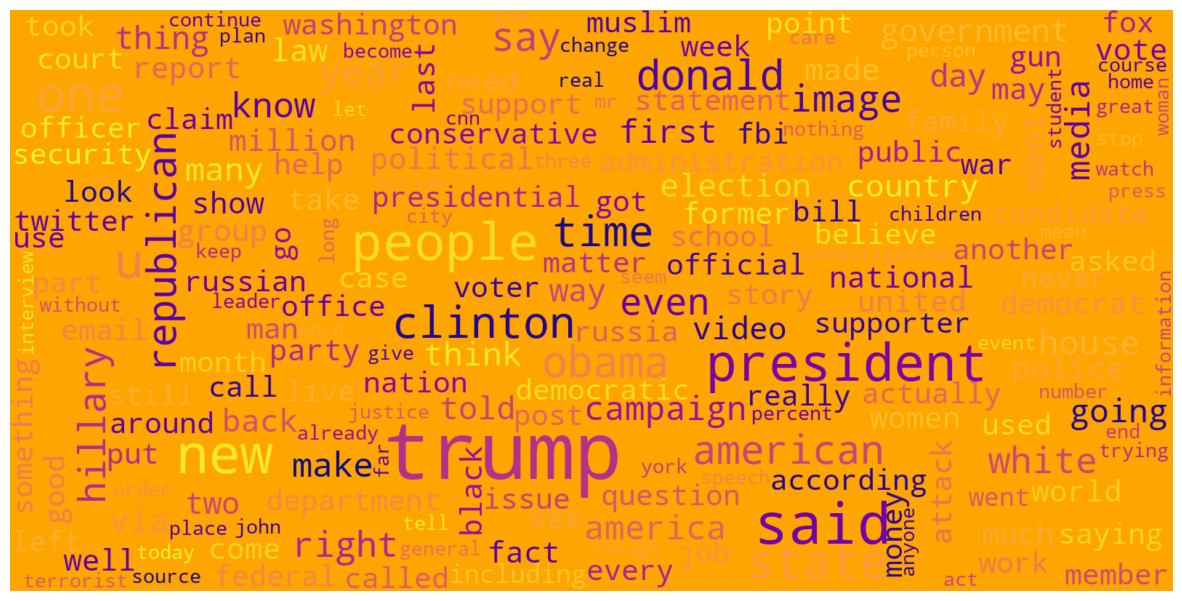

In [25]:
# Fake
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False,
                     background_color='orange',  # Change background color
                    colormap='plasma')
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['class'], 
                                                    test_size=0.25)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9934993618094927
0.9864648263579697


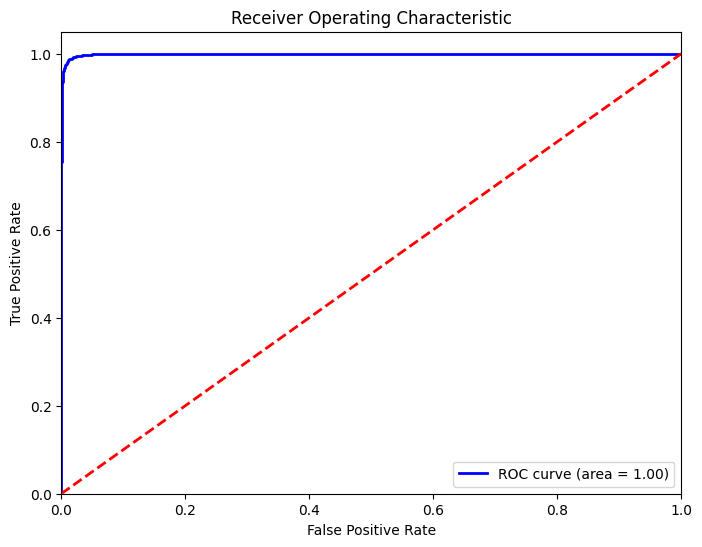

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


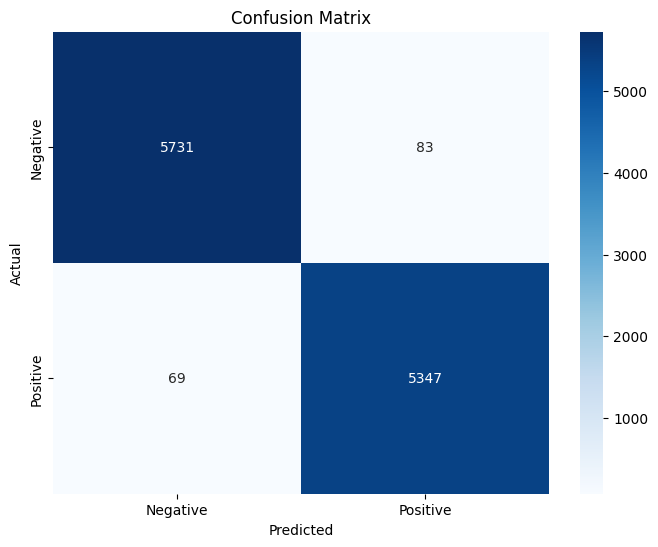

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Decision Trees
# Description: This model uses a tree-like graph of decisions and their possible consequences, including chance event outcomes.
# Performance: Decision Trees have shown accuracy rates close to 99%, making them highly effective for binary classification tasks such as fake news detection 3.
# 4. Logistic Regression
# Description: A statistical method for predicting binary classes, logistic regression estimates probabilities using a logistic function.
# Performance: Similar to Decision Trees, it can achieve accuracy rates around 99%, demonstrating its effectiveness in distinguishing between fake and real news articles

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9999703167205913
0.9970614425645592


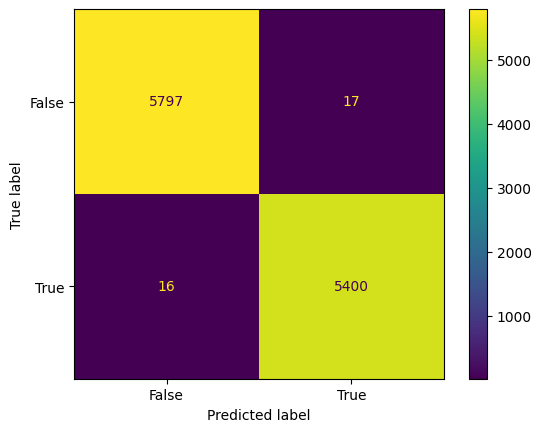

In [29]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [1]:
import nltk

# Download punkt tokenizer and stopwords
nltk.download('punkt')      # For sentence and word tokenization
nltk.download('stopwords')  # For removing common stopwords in English


[nltk_data] Downloading package punkt to C:\Users\M THIRUPATHI
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\M THIRUPATHI
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True